In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def prepare_data(n_samples):
    data = []
    pois = []
    nuisances = []
    
    for i in range(n_samples):
        sig_bkg = np.random.uniform(low = 0.0, high = 1.0, size = 1)
        if sig_bkg > 0.5:
            nuisance = np.random.uniform(low = 0.0, high = 2.0)
            data.append(np.random.multivariate_normal(mean = [0.0, nuisance], cov = np.array([[1, -0.5], [-0.5, 1]]), size = 1).flatten())
            pois.append(1.0)
        else:
            nuisance = np.random.uniform(low = 0.0, high = 2.0)
            data.append(np.random.multivariate_normal(mean = [1.0, nuisance], cov = np.eye(2), size = 1).flatten())
            pois.append(0.0)
            
        nuisances.append(nuisance)
    data = np.array(data)
    pois = np.array(pois)
    nuisances = np.array(nuisances)
    
    return data, pois, nuisances

In [9]:
data_train, pois_train, nuisances_train = prepare_data(50000)

In [10]:
sig = pois_train == 1
bkg = pois_train == 0

In [16]:
plt.hexbin(x = data_train[sig, 0], y = data_train[sig, 1], bins = 'log', gridsize = 50)
ax = plt.gca()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 4])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar()
#plt.show()
plt.savefig("sig.pdf")

In [18]:
plt.hexbin(x = data_train[bkg, 0], y = data_train[bkg, 1], bins = 'log', gridsize = 50)
ax = plt.gca()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 4])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar()
#plt.show()
plt.savefig("bkg.pdf")

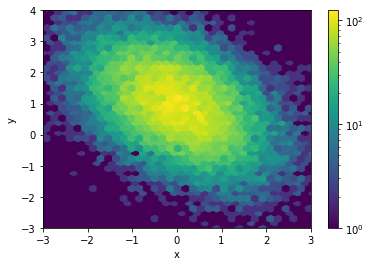

In [17]:
plt.show()